# Desafio Stone

### Resolvido por Rhenan Silva Nehlsen


In [86]:
#Bibliotecas que usarei
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
#Lendo os datasets
df_customers = pd.read_csv('dataset-customers.csv', sep=';')
df_cards = pd.read_csv('dataset-cards.csv', sep=';')
df_frauds = pd.read_csv('dataset-frauds.csv', sep=';')
df_transactions = pd.read_csv('dataset-transactions.csv', sep=';')

## 1) Questões

### Qual a média de idade dos clientes no banco de dados?

In [3]:
#Conhecendo o dataset
df_customers.head()

,id,age,segment,vintage_group
0,CC25034,35,Diamond,VG1
1,CC59625,22,Diamond,VG1
2,CC69314,33,Diamond,VG1
3,CC67036,46,Diamond,VG1
4,CC25597,44,Diamond,VG1


In [4]:
## Média de idade

#Podemos calcular a média de idade de duas maneiras

#df_customers['age'].mean() -- mostra a média diretamente

df_customers['age'].describe() # mostra outras estatísticas 

count    5674.000000
mean       35.059922
std         8.962637
min        20.000000
25%        27.000000
50%        35.000000
75%        43.000000
max        50.000000
Name: age, dtype: float64

Os clientes tem idade média de 35,06 anos

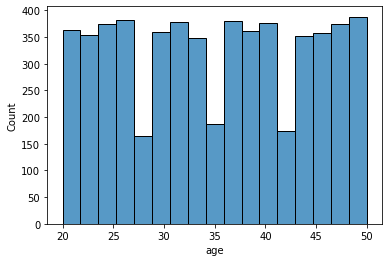

In [100]:
#Visialuzando a distribuição de idades
sns.histplot(df_customers['age']);

### Como a "família do cartão" é classificada baseada em seu limite de crédito?

In [101]:
#Conhecendo o dataset
df_cards.head()

,card_number,card_family,credit_limit,customer_id
0,8638-5407-3631-8196,Premium,530000,CC67088
1,7106-4239-7093-1515,Gold,18000,CC12076
2,6492-5655-8241-3530,Premium,596000,CC97173
3,2868-5606-5152-5706,Gold,27000,CC55858
4,1438-6906-2509-8219,Platinum,142000,CC90518


Para responder a pergunta acima, podemos verificar o intervalo de limites de crédito em que cada família de cartão está.

In [102]:
#Agrupa os dados baseado na família do cartão e calcula algumas estatísticas
df_cards.groupby('card_family')['credit_limit'].agg(['min', 'max', 'mean'])

,min,max,mean
card_family,,,
Gold,2000,50000,27878.453039
Platinum,51000,200000,131294.642857
Premium,108000,899000,514763.285024


Da tabela anterior, a classificação dos limites de crédito das famílias dos cartões em ordem crescente é : Gold, Platinum e Premium.

### Para as transações fraudulentas, quais são os ids daquelas com maior valor?

In [115]:
#Conhecendo o dataset
df_frauds.head()

,transaction_id,fraud_flag
0,CTID50558449,True
1,CTID55936882,True
2,CTID63762180,True
3,CTID76723439,True
4,CTID21246201,True


In [104]:
#Conhecendo o dataset
df_transactions.head()

,id,card_number,transaction_date,value,segment
0,CTID28830551,1629-9566-3285-2123,2016-04-24,23649,SEG25
1,CTID45504917,3697-6001-4909-5350,2016-02-11,26726,SEG16
2,CTID47312290,5864-4475-3659-1440,2016-11-01,22012,SEG14
3,CTID25637718,5991-4421-8476-3804,2016-01-28,37637,SEG17
4,CTID66743960,1893-8853-9900-8478,2016-03-17,5113,SEG14


Para responder a pergunta, precimos unir os datasets de fraudes e de transações, calcular o maior valor transacionado e pegar os ids das transações com este valor.

In [105]:
#Une os datasets
df_fraudulentas = df_transactions.merge(df_frauds, left_on='id', right_on='transaction_id')

#Obtem o maior valor das fraudes
maximo_fraude = df_fraudulentas['value'].max()

#Obtem os ids 
ids = df_fraudulentas.query('value == @maximo_fraude')['id'].to_list()

print('Maior valor transacionado em fraudes: ', maximo_fraude)
print('Id(s) das transações com este valor: ')
for id in ids:
    print(id)

Maior valor transacionado em fraudes:  49155
Id(s) das transações com este valor: 
CTID20567160


## 2) Análise

Para analisar se outras features do dataset estão associadas às trasações fraudulentas, vamos dividr a abordagem em três caminhos:

1. Análise dos clientes
 - Idade
 - Número do cartão
 - Familia do cartão
 
 
2. Análse da transação
 - Valor da transação
 - Data da transação
 

3. Relações entre 1 e 2 
 

Para facilitar a análise, vamos juntar todos os datasets em um único.

In [107]:
 # Cada cartão está relacionado a um cliente
df_consolidado = df_customers.merge(df_cards, left_on='id', right_on='customer_id', how='inner')
df_consolidado.drop(columns=['id'], inplace=True) # a coluna id é igual a costumer_id

#Cada transação está relacionada a um cartão
df_consolidado = df_consolidado.merge(df_transactions, left_on='card_number', right_on='card_number')
df_consolidado.rename(columns={'id': 'transaction_id'}, inplace= True)

#Cada transação fraudulenta está relacionada a uma transação
df_consolidado = df_consolidado.merge(df_frauds, left_on='transaction_id', right_on='transaction_id', how='left')

# Identifica as transações não fraudulentas
df_consolidado['fraud_flag'].fillna(False, inplace=True)

In [112]:
df_consolidado.sample(5)

,age,segment_x,vintage_group,card_number,card_family,credit_limit,customer_id,transaction_id,transaction_date,value,segment_y,fraud_flag
2607,24,Gold,VG3,8115-7743-6213-9284,Premium,796000,CC42687,CTID47772199,2016-07-01,23786,SEG23,False
3437,30,Platinum,VG2,5590-1294-8800-2874,Premium,516000,CC28205,CTID56747160,2016-05-09,3063,SEG21,False
6328,48,Platinum,VG2,3440-3330-5015-4988,Premium,549000,CC28038,CTID26082501,2016-01-16,39426,SEG11,False
9947,49,Platinum,VG2,9558-5469-2562-5608,Premium,596000,CC30954,CTID68254021,2016-08-23,46952,SEG20,False
9726,40,Platinum,VG2,6514-4444-5642-2615,Premium,356000,CC60423,CTID57912145,2016-07-21,544,SEG19,False


In [119]:
print('Proporção de transações fraudulentas: ', 100*len(df_frauds)/len(df_consolidado), '%')

Proporção de transações fraudulentas:  1.09 %


Antes de qualquer coisa, vale a pena verificar a matriz de correlação das variáveis a fim de encontrar relações mais evidentes.

In [113]:
df_consolidado.corr()

,age,credit_limit,value,fraud_flag
age,1.000000,-0.012878,-0.001739,-0.006525
credit_limit,-0.012878,1.000000,-0.006661,-0.005704
value,-0.001739,-0.006661,1.000000,0.014976
fraud_flag,-0.006525,-0.005704,0.014976,1.000000


As variáveis estão fracamente correlacionadas. 

### Análise dos clientes 

Podemos começar verificando se há alguma diferença na distribuição de idade dos clientes que comentem fraudes.

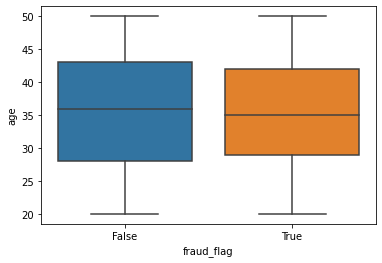

In [116]:
sns.boxplot(x='fraud_flag', y='age', data=df_consolidado);

Visualmente, não a diferença significativa de idade.

Ainda analisando os clientes, podemos ver se há recorrência no cometimento de fraude. 

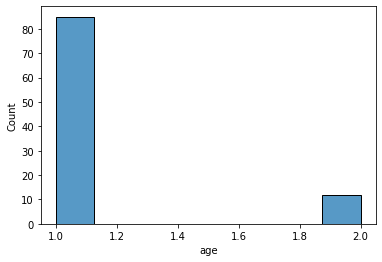

In [132]:
sns.histplot(df_consolidado.query('fraud_flag==True').groupby('customer_id')['age'].count());

Podemos ver que há uma baixa recorrência.

Por fim, vale verificar a proporção de fraudes por família de cartão 

In [137]:
familias = df_cards['card_family'].unique()

for familia in familias:
    print(f'''Proporção de fraudes na família {familia} = 
          {df_consolidado.query('fraud_flag==True & card_family==@familia')['age'].count()/
           df_consolidado.query('card_family==@familia')['age'].count()}''')

Proporção de fraudes na família Premium = 
          0.010978287387167602
Proporção de fraudes na família Gold = 
          0.010726072607260726
Proporção de fraudes na família Platinum = 
          0.011037527593818985


As proporções são bem proxímas.

### Análise das transações 

Uma primeira ideia que pode ser testada é que o valor das transações fraudulentas são maiores.

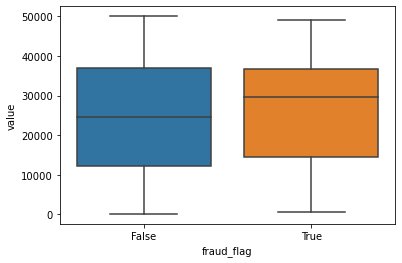

In [138]:
sns.boxplot(x='fraud_flag', y='value', data=df_consolidado);

Na média, os valores das transações fraudulentas parecem ser maiores. Mas, como apenas 1% das transações são fraudulentas, devemos tomar cuidado com esta observação. Faremos um teste de hipóteses para verificar se realmente a média é maior.

In [139]:
from scipy.stats import t

def aspin_welch(amostra1, amostra2):
    #Calcula o número de graus de liberdade da t-student pelo critério de Aspin-Welch
    w1 = amostra1.var()/len(amostra1)
    w2 = amostra2.var()/len(amostra2)
    
    denominador = (w1**2)/(len(amostra1)+1) + (w2**2)/(len(amostra2)+1)
    
    return ((w1+w2)**2)/denominador -2

def teste_hipotese_t(alpha, mediaMenor, mediaMaior):
    # Teste de hipótese T assumindo que as variâncias populacionais são distintas
    
    media = mediaMaior.mean() - mediaMenor.mean()
    
    n1 = len(mediaMaior) -1
    n2 = len(mediaMenor) -1
    variancia = (n1*mediaMaior.var() + n2*mediaMaior.var())/(n1 + n2)
    
    t_calc = media/np.sqrt(variancia*(1/(n1+1 + 1/(n2+1))))
    
    graus = aspin_welch(mediaMaior, mediaMenor)
    
    t_crit = t.ppf(1-alpha, graus)
    
    print('t-calculado: ', t_calc)
    print('t-crítico: ', t_crit)
    
    return t_calc>t_crit
                           


In [144]:
alphas = [0.01, 0.05, 0.1]
for alpha in alphas:
    print('Confiança: ', 1-alpha)
    print('A media dos valores das transações fraudulentas é maior: ',
          teste_hipotese_t(alpha, df_consolidado.query('fraud_flag==False')['value'],
                          df_consolidado.query('fraud_flag==True')['value']))
    print('\n')

Confiança:  0.99
t-calculado:  1.5941846270937265
t-crítico:  2.360494385224715
A media dos valores das transações fraudulentas é maior:  False


Confiança:  0.95
t-calculado:  1.5941846270937265
t-crítico:  1.6587304375905343
A media dos valores das transações fraudulentas é maior:  False


Confiança:  0.9
t-calculado:  1.5941846270937265
t-crítico:  1.2892433237276217
A media dos valores das transações fraudulentas é maior:  True




Com base no teste de hipóteses, podemos afirmar com 90% de confiança que a média dos valores das transações fraudulentas é maior.


Agora, podemos olhar para a quantidade de fraudes por dia da semana

In [171]:
from datetime import datetime as dt

#Obtem o dia da semana de uma data, sendo que 0 significa segunda e 6 significa domingo
df_consolidado['transaction_weekday'] = df_consolidado['transaction_date'].apply(lambda x: dt.strptime(x, '%Y-%m-%d').weekday())


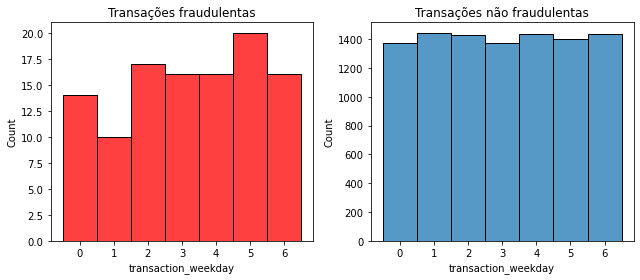

In [181]:
fig, axes = plt.subplots(1,2, figsize=(9,4))

sns.histplot(ax= axes[0],x='transaction_weekday', discrete=True ,data=df_consolidado.query('fraud_flag==True'), color='r');
axes[0].set_title('Transações fraudulentas');
sns.histplot(ax=axes[1], x='transaction_weekday',discrete=True ,data=df_consolidado.query('fraud_flag==False'));
axes[1].set_title('Transações não fraudulentas');

fig.tight_layout()

Enquanto as transações não fraudulentas estão uniformemente distribuidas, as transações fradulentas parecem estar mais concentradas no final de semana. Utilizando esta observação e a anterior de que a média dos valores é maior, podemos fazer um teste de hipóteses para cada dia da semana, a fim de obter uma confiaça maior.

In [186]:
for i in range(7):
    print('Dia ', i)
    print('A media dos valores das transações fraudulentas é maior: ',
          teste_hipotese_t(0.05, df_consolidado.query('fraud_flag==False & transaction_weekday==@i')['value'],
                          df_consolidado.query('fraud_flag==True & transaction_weekday==@i')['value']))
    print('\n')

Dia  0
t-calculado:  -0.020571964818230763
t-crítico:  1.767919889893838
A media dos valores das transações fraudulentas é maior:  False


Dia  1
t-calculado:  1.1487352383173368
t-crítico:  1.8284250173760999
A media dos valores das transações fraudulentas é maior:  False


Dia  2
t-calculado:  1.5412058089921923
t-crítico:  1.7424530444973585
A media dos valores das transações fraudulentas é maior:  False


Dia  3
t-calculado:  0.8907637378672063
t-crítico:  1.7495233275778053
A media dos valores das transações fraudulentas é maior:  False


Dia  4
t-calculado:  -1.9332617368135228
t-crítico:  1.7498527800766124
A media dos valores das transações fraudulentas é maior:  False


Dia  5
t-calculado:  2.2225339504660977
t-crítico:  1.7254210438643345
A media dos valores das transações fraudulentas é maior:  True


Dia  6
t-calculado:  0.5232474579400801
t-crítico:  1.7502147807063269
A media dos valores das transações fraudulentas é maior:  False




Com 95% de confinça, apenas no sábado a média do valor das transações fraudulentas foi maior. Logo, não podemos relacionar os dias da semana que ocorrem as fraudes com a média valores das transações.



### Relações entre clientes e transações

Para finalizar, vamos cruzar as informações dos clientes com as das transações feitas por eles.

Como ponto de partida, analisaremos se a transação fraudulenta de um cliente foge dos padrões das transações anteriores.

In [211]:
fraudadores = df_consolidado.query('fraud_flag==True')['customer_id'].unique()

df_fraudadores = []
for fraudador in fraudadores:
    for valor in df_consolidado.query('fraud_flag==True & customer_id==@fraudador')['value'].to_list():
        fraude_dict ={
            'customer_id': fraudador,
            'media_sem_fraude': df_consolidado.query('fraud_flag==False & customer_id==@fraudador')['value'].mean(),
            'numero_transacoes_sem_fraude': df_consolidado.query('fraud_flag==False & customer_id==@fraudador')['value'].count(),
            'fraude': valor,
        }

        df_fraudadores.append(fraude_dict)
        del fraude_dict

df_fraudadores = pd.DataFrame.from_dict(df_fraudadores)

df_fraudadores['diferenca_media'] = df_fraudadores.apply(lambda x : x['fraude'] - x['media_sem_fraude'], axis=1)

In [229]:
df_fraudadores.sample(5)

,customer_id,media_sem_fraude,numero_transacoes_sem_fraude,fraude,diferenca_media
64,CC29686,21612.714286,14,6477,-15135.714286
3,CC93075,22392.380952,21,30339,7946.619048
88,CC92155,22208.136364,22,25383,3174.863636
9,CC35750,17072.166667,18,27347,10274.833333
62,CC28038,26123.952381,21,8243,-17880.952381


In [207]:
df_fraudadores.describe()

,media_sem_fraude,numero_transacoes_sem_fraude,fraude,diferenca_media
count,109.000000,109.000000,109.000000,109.000000
mean,24665.250534,21.174312,26808.880734,2143.630200
std,3062.999207,8.481837,13574.318372,14379.130047
min,16385.888889,10.000000,683.000000,-26430.526316
25%,22633.545455,16.000000,14586.000000,-10308.000000
50%,25031.571429,20.000000,29746.000000,5837.090909
75%,26553.920000,23.000000,36706.000000,13817.111111
max,33414.526316,55.000000,49155.000000,28063.500000


Como o desvio padrão da diferença entre valor da transação fraudulenta e a média dos valores das transações de cada cliente fraudador é muito alto, não podemos usar está diferença como indicador de fraude.

Resta agora verificar se há um padrão no número de transações que um cliente fraudador realiza. 

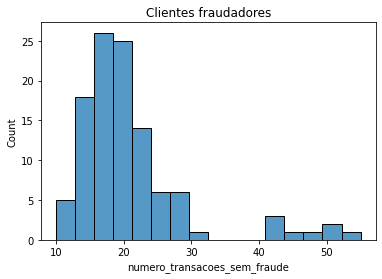

In [240]:
sns.histplot(x= 'numero_transacoes_sem_fraude', data = df_fraudadores);
plt.title('Clientes fraudadores');

In [235]:
numero_transacoes = []

for c in df_consolidado['customer_id'].unique():
    if c not in fraudadores:
        numero_transacoes.append(df_consolidado.query('customer_id ==@c')['value'].count())


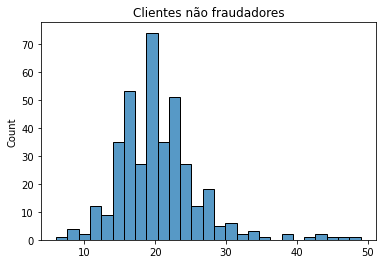

In [241]:
sns.histplot(numero_transacoes);
plt.title('Clientes não fraudadores');

As distribuições são muito parecidas, logo este parâmetro também pode ser descartado.

## Conclusão

Para concluir, não foi possível encontrar nenhuma forte relação entre as features do dataset e as transações fraudulentas. 
A média do valor das fraudes pareceu ser um pouco superior, mas devido a baixa frequência de fraudes no dataset, não é possível afirmar que esta observação é verdadeira.